#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [22]:
#模型編譯
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [23]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 74s 2ms/step - loss: 1.5173 - accuracy: 0.4554 - val_loss: 1.3069 - val_accuracy: 0.5774
Epoch 2/12
37500/37500 [==============================] - 46s 1ms/step - loss: 1.1455 - accuracy: 0.5927 - val_loss: 1.1169 - val_accuracy: 0.6413
Epoch 3/12
37500/37500 [==============================] - 46s 1ms/step - loss: 1.0044 - accuracy: 0.6467 - val_loss: 1.0559 - val_accuracy: 0.6508
Epoch 4/12
37500/37500 [==============================] - 46s 1ms/step - loss: 0.9005 - accuracy: 0.6819 - val_loss: 0.9927 - val_accuracy: 0.6781
Epoch 5/12
37500/37500 [==============================] - 46s 1ms/step - loss: 0.8107 - accuracy: 0.7113 - val_loss: 0.9098 - val_accuracy: 0.6919
Epoch 6/12
37500/37500 [==============================] - 46s 1ms/step - loss: 0.7362 - accuracy: 0.7400 - val_loss: 0.8542 - val_accuracy: 0.7197
Epoch 7/12
37500/37500 [==============================] - 46s 1ms/st

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

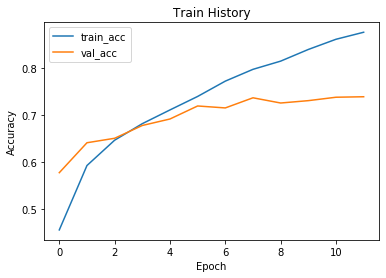

In [25]:
show_train_history('accuracy','val_accuracy')

In [26]:
def check_model(loss_function) :
        
    model.compile(loss = loss_function, optimizer='sgd', metrics=['accuracy'])

    #模型訓練, "Train_History" 把訓練過程所得到的數值存起來
    train_history = model.fit(x_img_train_normalize, 
                              y_label_train_OneHot,
                              validation_split=0.25,
                              epochs=12, 
                              batch_size=128, 
                              verbose=1
                             )         

    # [validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的比例。
    # 該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
    # [batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

    # 定義一個繪圖函數
    def show_train_history(train_history, train, validation):
        plt.plot(train_history.history[train])
        plt.plot(train_history.history[validation])
        plt.title('Train History')
        plt.ylabel(train)
        plt.xlabel('Epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()
        
    # plot
    show_train_history(train_history, 'accuracy', 'val_accuracy')
    plt.show()
    show_train_history(train_history, 'loss', 'val_loss')

    # scores
    scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
    print()
    print('accuracy=',scores[1])

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 41s 1ms/step - loss: 1.1396 - accuracy: 0.6455 - val_loss: 0.9125 - val_accuracy: 0.6906
Epoch 2/12
37500/37500 [==============================] - 40s 1ms/step - loss: 0.4719 - accuracy: 0.8378 - val_loss: 0.8408 - val_accuracy: 0.7178
Epoch 3/12
37500/37500 [==============================] - 40s 1ms/step - loss: 0.3956 - accuracy: 0.8614 - val_loss: 0.8876 - val_accuracy: 0.7069
Epoch 4/12
37500/37500 [==============================] - 40s 1ms/step - loss: 0.3573 - accuracy: 0.8766 - val_loss: 0.7837 - val_accuracy: 0.7378
Epoch 5/12
37500/37500 [==============================] - 40s 1ms/step - loss: 0.3275 - accuracy: 0.8844 - val_loss: 0.8011 - val_accuracy: 0.7314
Epoch 6/12
37500/37500 [==============================] - 40s 1ms/step - loss: 0.3102 - accuracy: 0.8921 - val_loss: 0.7776 - val_accuracy: 0.7399
Epoch 7/12
37500/37500 [==============================] - 40s 1ms/st

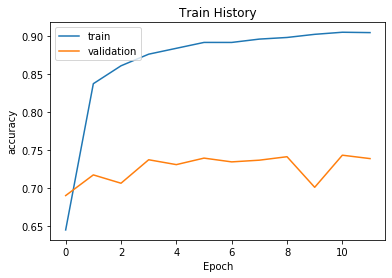

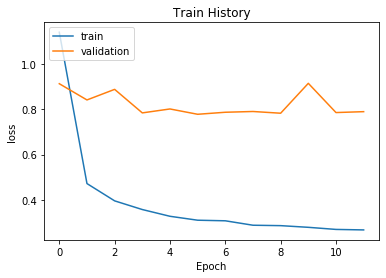

10000/10000 [==============================] - 4s 436us/step

accuracy= 0.7408000230789185


In [27]:
loss_function = 'categorical_crossentropy'
check_model(loss_function)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 41s 1ms/step - loss: 0.0124 - accuracy: 0.9164 - val_loss: 0.0355 - val_accuracy: 0.7454
Epoch 2/12
37500/37500 [==============================] - 40s 1ms/step - loss: 0.0120 - accuracy: 0.9191 - val_loss: 0.0353 - val_accuracy: 0.7468
Epoch 3/12
37500/37500 [==============================] - 40s 1ms/step - loss: 0.0122 - accuracy: 0.9189 - val_loss: 0.0354 - val_accuracy: 0.7457
Epoch 4/12
37500/37500 [==============================] - 40s 1ms/step - loss: 0.0122 - accuracy: 0.9174 - val_loss: 0.0354 - val_accuracy: 0.7451
Epoch 5/12
37500/37500 [==============================] - 40s 1ms/step - loss: 0.0120 - accuracy: 0.9184 - val_loss: 0.0353 - val_accuracy: 0.7460
Epoch 6/12
37500/37500 [==============================] - 40s 1ms/step - loss: 0.0120 - accuracy: 0.9198 - val_loss: 0.0355 - val_accuracy: 0.7446
Epoch 7/12
37500/37500 [==============================] - 40s 1ms/st

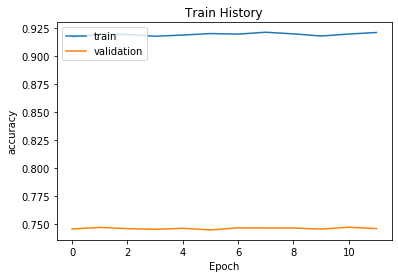

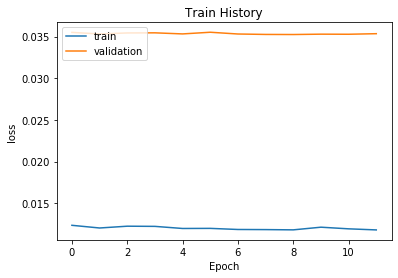

10000/10000 [==============================] - ETA:  - 3s 326us/step

accuracy= 0.7462000250816345


In [28]:
loss_function = 'mean_squared_error'
check_model(loss_function)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 42s 1ms/step - loss: 0.0414 - accuracy: 0.9844 - val_loss: 0.1256 - val_accuracy: 0.9525
Epoch 2/12
37500/37500 [==============================] - 40s 1ms/step - loss: 0.0413 - accuracy: 0.9843 - val_loss: 0.1251 - val_accuracy: 0.9527
Epoch 3/12
37500/37500 [==============================] - 40s 1ms/step - loss: 0.0414 - accuracy: 0.9844 - val_loss: 0.1246 - val_accuracy: 0.9529
Epoch 4/12
37500/37500 [==============================] - 40s 1ms/step - loss: 0.0415 - accuracy: 0.9842 - val_loss: 0.1259 - val_accuracy: 0.9527
Epoch 5/12
37500/37500 [==============================] - 40s 1ms/step - loss: 0.0408 - accuracy: 0.9846 - val_loss: 0.1249 - val_accuracy: 0.9528
Epoch 6/12
37500/37500 [==============================] - 40s 1ms/step - loss: 0.0411 - accuracy: 0.9846 - val_loss: 0.1260 - val_accuracy: 0.9526
Epoch 7/12
37500/37500 [==============================] - 40s 1ms/st

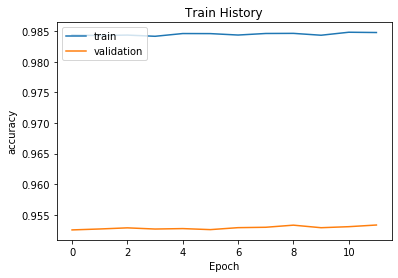

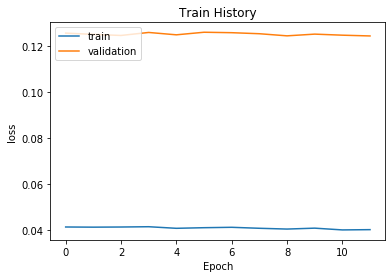

10000/10000 [==============================] - 3s 330us/step

accuracy= 0.9527000188827515


In [29]:
loss_function = 'binary_crossentropy'
check_model(loss_function)